# Title of notebook

Brief 1-2 sentence description of notebook.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Imports of all used packages and libraries
import os
import glob
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns


In [3]:
import spikeinterface.extractors as se
import spikeinterface.preprocessing as sp
from spectral_connectivity import Multitaper, Connectivity
import spectral_connectivity

## Inputs & Data

Explanation of each input and where it comes from.

In [4]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case
OUTPUT_DIR = r"./proc/" # where data is saved should always be shown in the inputs
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [5]:
CHANNEL_MAPPING_DF = pd.read_excel("../../data/channel_mapping.xlsx")
TONE_TIMESTAMP_DF = pd.read_excel("../../data/rce_tone_timestamp.xlsx", index_col=0)

In [6]:
channel_map_and_all_trials_df = pd.read_pickle("./proc/full_baseline_and_trial_lfp_traces.pkl")

In [7]:
TIME_HALFBANDWIDTH_PRODUCT = 2
TIME_WINDOW_DURATION = 1
TIME_WINDOW_STEP = 0.5
RESAMPLE_RATE=1000


In [8]:
TRIAL_OR_BASELINE_TO_STYLE = {'baseline': "--", "trial": "-"}

In [9]:
BASELINE_OUTCOME_TO_COLOR = {'lose': "red",
 'omission': "orange",
 'rewarded': "green",
 'win': "blue"}

In [10]:
GROUPINGS = "trial_outcome"

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

# Functions

In [11]:
def generate_pairs(lst):
    pairs = []
    n = len(lst)
    for i in range(n):
        for j in range(i+1, n):
            pairs.append((lst[i], lst[j]))
    return pairs

In [ ]:
def nested_dict():
    return defaultdict(dict)

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [12]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

# Ideally functions are defined here first and then data is processed using the functions

# function names are short and in snake case all lowercase
# a function name should be unique but does not have to describe the function
# doc strings describe functions not function names




In [13]:
channel_map_and_all_trials_df.head()

time                                      recording_dir  \
0   6310663  20221202_134600_omission_and_competition_subje...   
1   7910662  20221202_134600_omission_and_competition_subje...   
2   9710660  20221202_134600_omission_and_competition_subje...   
3  11310658  20221202_134600_omission_and_competition_subje...   
4  12810657  20221202_134600_omission_and_competition_subje...   

                                      recording_file  time_stamp_index  \
0  20221202_134600_omission_and_competition_subje...           1390826   
1  20221202_134600_omission_and_competition_subje...           2990825   
2  20221202_134600_omission_and_competition_subje...           4790823   
3  20221202_134600_omission_and_competition_subje...           6390821   
4  20221202_134600_omission_and_competition_subje...           7890820   

                                          video_file  video_frame  \
0  20221202_134600_omission_and_competition_subje...         1734   
1  20221202_134600_omission_and_competition_subje...         3728   
2  20221202_134600_omission_and_competition_subje...         5972   
3  20221202_134600_omission_and_competition_subje...         7966   
4  20221202_134600_omission_and_competition_subje...         9836   

   video_number      subject_info competition_closeness  \
0           1.0  6_1_top_2_base_3              rewarded   
1           1.0  6_1_top_2_base_3              rewarded   
2           1.0  6_1_top_2_base_3              rewarded   
3           1.0  6_1_top_2_base_3              omission   
4           1.0  6_1_top_2_base_3              rewarded   

                                          video_name  ...  \
0  20221202_134600_omission_and_competition_subje...  ...   
1  20221202_134600_omission_and_competition_subje...  ...   
2  20221202_134600_omission_and_competition_subje...  ...   
3  20221202_134600_omission_and_competition_subje...  ...   
4  20221202_134600_omission_and_competition_subje...  ...   

                             mPFC_baseline_lfp_trace  \
0  [1.8457601, 1.7363818, 1.6475118, 1.59738, 1.2...   
1  [1.2191132, 1.1348007, 1.2054409, 1.0960625, 0...   
2  [-1.2669662, -1.2965895, -1.2532939, -0.986684...   
3  [-2.0257788, -2.0348935, -1.9323514, -1.754611...   
4  [-0.5765152, 0.25749493, 0.6403192, 0.4375135,...   

                                mPFC_trial_lfp_trace  \
0  [0.6927297, 0.96389693, 0.7884358, -0.04101689...   
1  [1.0732753, 0.7246318, 0.7633699, 0.3782669, -...   
2  [0.28711826, 0.84996116, 1.0960625, 0.8226166,...   
3  [2.376701, 2.3015034, 1.7796774, 0.9411098, 0....   
4  [-0.043295607, 0.73602533, 0.31674156, 0.07747...   

                             vHPC_baseline_lfp_trace  \
0  [-0.06969439, -0.09568214, -0.05315674, 0.1571...   
1  [0.31539667, 0.23152715, 0.29767776, 0.4217101...   
2  [-1.2556804, -1.2580429, -1.3312811, -1.118654...   
3  [0.16655779, 0.42879772, 0.66268736, 0.6934002...   
4  [-0.31421542, 0.19727057, 0.4453354, 0.3744597...   

                                vHPC_trial_lfp_trace  \
0  [1.5864334, 1.5710771, 1.5970649, 1.2155175, 0...   
1  [0.03543783, -0.27641505, -0.40044746, -0.6638...   
2  [0.060244307, 0.4748669, 0.7654571, 0.6591436,...   
3  [-1.8427671, -2.303459, -2.6802812, -3.060647,...   
4  [0.21617076, 0.8221576, 0.58236164, 0.43116024...   

                              BLA_baseline_lfp_trace  \
0  [2.0367627, 2.1163385, 2.1618104, 2.2679114, 2...   
1  [0.3107247, 0.14209972, -0.05873455, -0.331566...   
2  [-1.9912907, -1.9041362, -1.9325562, -1.542255...   
3  [-1.2637402, -1.0382752, -0.82986236, -0.74649...   
4  [-2.1352851, -2.0576038, -2.0822346, -2.140969...   

                                 BLA_trial_lfp_trace  \
0  [0.3164087, 0.36377528, 0.18757163, -0.5020857...   
1  [0.026525281, -0.04547191, 0.11936376, -0.4092...   
2  [0.69344664, 1.4001559, 1.7582471, 1.4304705, ...   
3  [2.6771586, 2.3929594, 2.209177, 1.9761335, 1....   
4  [-0.18188764, 0.113679774, -0.66123736, -0.935...   

      

In [14]:
trace_columns = [col for col in channel_map_and_all_trials_df.columns if "trace" in col]

In [15]:
id_cols = [col for col in channel_map_and_all_trials_df.columns if col not in trace_columns]

In [16]:
trace_columns

['mPFC_baseline_lfp_trace',
 'mPFC_trial_lfp_trace',
 'vHPC_baseline_lfp_trace',
 'vHPC_trial_lfp_trace',
 'BLA_baseline_lfp_trace',
 'BLA_trial_lfp_trace',
 'LH_baseline_lfp_trace',
 'LH_trial_lfp_trace',
 'MD_baseline_lfp_trace',
 'MD_trial_lfp_trace']

In [17]:
channel_map_and_all_trials_df = channel_map_and_all_trials_df.reset_index()

## Coherece Calculation

- Getting the brain region pairs

In [18]:
trial_trace_columns = sorted([col for col in channel_map_and_all_trials_df.columns if "trial_lfp_trace" in col])
baseline_trace_columns = sorted([col for col in channel_map_and_all_trials_df.columns if "baseline_lfp_trace" in col])

In [19]:
trial_trace_columns

['BLA_trial_lfp_trace',
 'LH_trial_lfp_trace',
 'MD_trial_lfp_trace',
 'mPFC_trial_lfp_trace',
 'vHPC_trial_lfp_trace']

In [20]:
trial_brain_region_pairs = generate_pairs(trial_trace_columns)
trial_brain_region_pairs = sorted(trial_brain_region_pairs)
baseline_brain_region_pairs = generate_pairs(baseline_trace_columns)
baseline_brain_region_pairs = sorted(baseline_brain_region_pairs)

In [21]:
trial_brain_region_pairs

[('BLA_trial_lfp_trace', 'LH_trial_lfp_trace'),
 ('BLA_trial_lfp_trace', 'MD_trial_lfp_trace'),
 ('BLA_trial_lfp_trace', 'mPFC_trial_lfp_trace'),
 ('BLA_trial_lfp_trace', 'vHPC_trial_lfp_trace'),
 ('LH_trial_lfp_trace', 'MD_trial_lfp_trace'),
 ('LH_trial_lfp_trace', 'mPFC_trial_lfp_trace'),
 ('LH_trial_lfp_trace', 'vHPC_trial_lfp_trace'),
 ('MD_trial_lfp_trace', 'mPFC_trial_lfp_trace'),
 ('MD_trial_lfp_trace', 'vHPC_trial_lfp_trace'),
 ('mPFC_trial_lfp_trace', 'vHPC_trial_lfp_trace')]

In [22]:
baseline_brain_region_pairs

[('BLA_baseline_lfp_trace', 'LH_baseline_lfp_trace'),
 ('BLA_baseline_lfp_trace', 'MD_baseline_lfp_trace'),
 ('BLA_baseline_lfp_trace', 'mPFC_baseline_lfp_trace'),
 ('BLA_baseline_lfp_trace', 'vHPC_baseline_lfp_trace'),
 ('LH_baseline_lfp_trace', 'MD_baseline_lfp_trace'),
 ('LH_baseline_lfp_trace', 'mPFC_baseline_lfp_trace'),
 ('LH_baseline_lfp_trace', 'vHPC_baseline_lfp_trace'),
 ('MD_baseline_lfp_trace', 'mPFC_baseline_lfp_trace'),
 ('MD_baseline_lfp_trace', 'vHPC_baseline_lfp_trace'),
 ('mPFC_baseline_lfp_trace', 'vHPC_baseline_lfp_trace')]

- Calculating the coherence

In [23]:
for region_1, region_2 in trial_brain_region_pairs:
    pair_base_name = "{}_{}".format(region_1.split("_")[0], region_2.split("_")[0])
    print(pair_base_name)
    try:
        multitaper_col = "{}_trial_multitaper".format(pair_base_name)
        channel_map_and_all_trials_df[multitaper_col] = channel_map_and_all_trials_df.apply(lambda x: Multitaper(time_series=np.array([x[region_1],x[region_2]]).T, sampling_frequency=RESAMPLE_RATE, time_halfbandwidth_product=TIME_HALFBANDWIDTH_PRODUCT, time_window_step=TIME_WINDOW_STEP, time_window_duration=TIME_WINDOW_DURATION), axis=1)
    
        connectivity_col = "{}_trial_connectivity".format(pair_base_name)
        channel_map_and_all_trials_df[connectivity_col] = channel_map_and_all_trials_df[multitaper_col].apply(lambda x: Connectivity.from_multitaper(x))
        
        channel_map_and_all_trials_df["{}_trial_frequencies".format(pair_base_name)] = channel_map_and_all_trials_df[connectivity_col].apply(lambda x: x.frequencies)
    
        channel_map_and_all_trials_df["{}_trial_coherence_magnitude".format(pair_base_name)] = channel_map_and_all_trials_df[connectivity_col].apply(lambda x: x.coherence_magnitude()[0, :, 0, 1])
    
    except Exception as e: 
        print(e)

BLA_LH
BLA_MD
BLA_mPFC
BLA_vHPC
LH_MD
LH_mPFC
LH_vHPC
MD_mPFC
MD_vHPC
mPFC_vHPC


In [24]:
for region_1, region_2 in baseline_brain_region_pairs:
    pair_base_name = "{}_{}".format(region_1.split("_")[0], region_2.split("_")[0])
    print(pair_base_name)
    try:
        multitaper_col = "{}_baseline_multitaper".format(pair_base_name)
        channel_map_and_all_trials_df[multitaper_col] = channel_map_and_all_trials_df.apply(lambda x: Multitaper(time_series=np.array([x[region_1],x[region_2]]).T, sampling_frequency=RESAMPLE_RATE, time_halfbandwidth_product=TIME_HALFBANDWIDTH_PRODUCT, time_window_step=TIME_WINDOW_STEP, time_window_duration=TIME_WINDOW_DURATION), axis=1)
    
        connectivity_col = "{}_baseline_connectivity".format(pair_base_name)
        channel_map_and_all_trials_df[connectivity_col] = channel_map_and_all_trials_df[multitaper_col].apply(lambda x: Connectivity.from_multitaper(x))
        
        channel_map_and_all_trials_df["{}_baseline_frequencies".format(pair_base_name)] = channel_map_and_all_trials_df[connectivity_col].apply(lambda x: x.frequencies)
    
        channel_map_and_all_trials_df["{}_baseline_coherence_magnitude".format(pair_base_name)] = channel_map_and_all_trials_df[connectivity_col].apply(lambda x: x.coherence_magnitude()[0, :, 0, 1])
    
    except Exception as e: 
        print(e)

BLA_LH
BLA_MD
BLA_mPFC
BLA_vHPC
LH_MD
LH_mPFC
LH_vHPC
MD_mPFC
MD_vHPC
mPFC_vHPC


In [25]:
all_pair_base_name = []
for region_1, region_2 in baseline_brain_region_pairs:
    all_pair_base_name.append("{}_{}".format(region_1.split("_")[0], region_2.split("_")[0]))
all_pair_base_name = sorted(all_pair_base_name)

In [26]:
all_pair_base_name

['BLA_LH',
 'BLA_MD',
 'BLA_mPFC',
 'BLA_vHPC',
 'LH_MD',
 'LH_mPFC',
 'LH_vHPC',
 'MD_mPFC',
 'MD_vHPC',
 'mPFC_vHPC']

In [27]:
low_freq = 0
high_freq = 100

In [28]:
channel_map_and_all_trials_df["BLA_LH_baseline_coherence_magnitude"]

0      [0.9994494479979938, 0.9978873885867781, 0.956...
1      [0.07764748152910403, 0.6160439104698197, 0.55...
2      [0.4310953491514308, 0.44784734306075313, 0.06...
3      [0.9305209090991936, 0.27793160270267325, 0.58...
4      [0.07886250075829898, 0.03826404630156092, 0.0...
                             ...                        
578    [0.4445537957357697, 0.9685775521887479, 0.620...
579    [0.6951010790459674, 0.42587298051878536, 0.22...
580    [0.3990138678369689, 0.5073400673835695, 0.682...
581    [0.4500673708559084, 0.5427200941779677, 0.500...
582    [0.6180148390141157, 0.2079103009772595, 0.095...
Name: BLA_LH_baseline_coherence_magnitude, Length: 583, dtype: object

In [29]:
all_frequencies = channel_map_and_all_trials_df["BLA_LH_baseline_frequencies"].iloc[0]

In [30]:
TRIAL_AND_BASELINE = ["trial", "baseline"]

In [31]:
channel_map_and_all_trials_df["competition_closeness"]

0      rewarded
1      rewarded
2      rewarded
3      omission
4      rewarded
         ...   
578    rewarded
579    rewarded
580    rewarded
581    omission
582    rewarded
Name: competition_closeness, Length: 583, dtype: object

In [32]:
channel_map_and_all_trials_df["competition_closeness"].unique()

array(['rewarded', 'omission', 'win_non_comp', 'win_comp',
       'lose_non_comp', 'lose_comp'], dtype=object)

In [33]:
BACKUP_channel_map_and_all_trials_df = channel_map_and_all_trials_df.copy()

BLA_LH


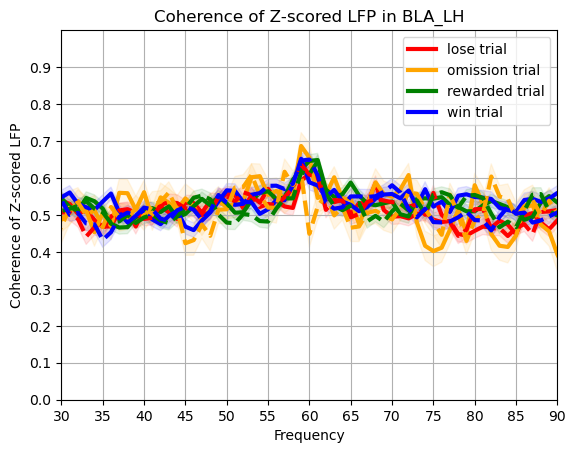

BLA_MD


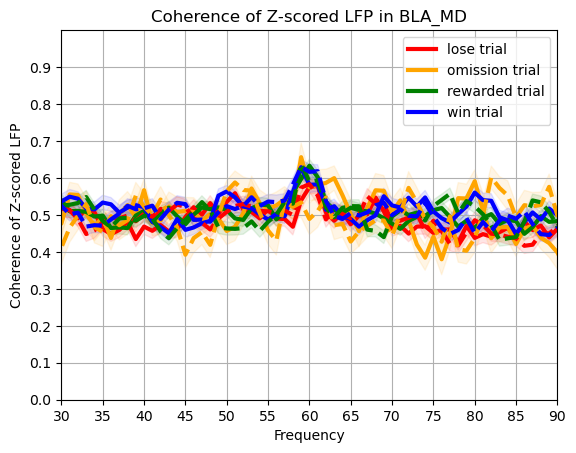

BLA_mPFC


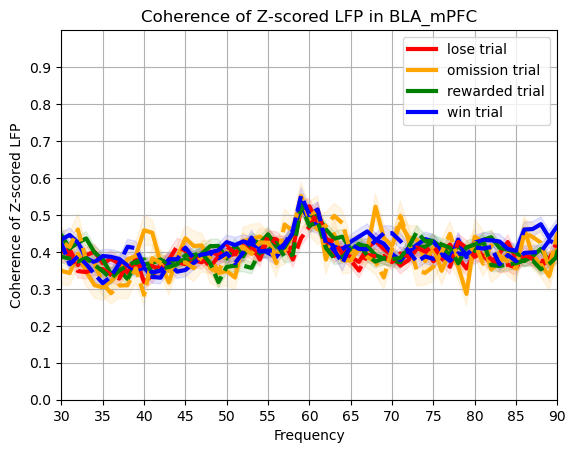

BLA_vHPC


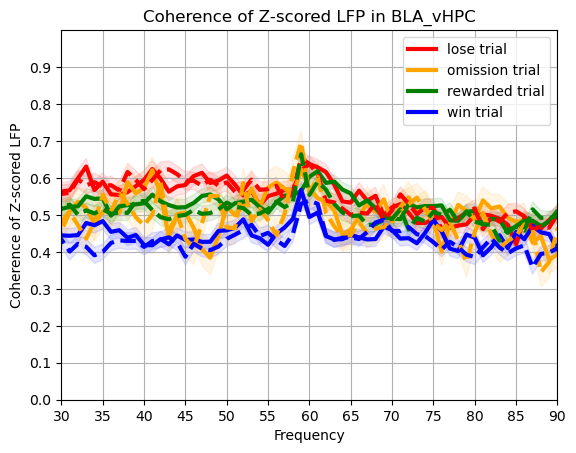

LH_MD


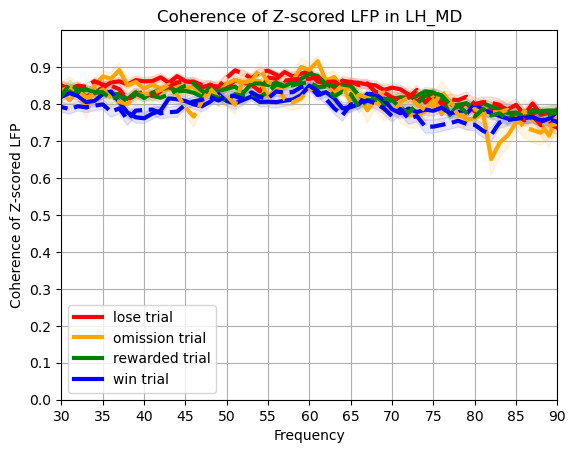

LH_mPFC


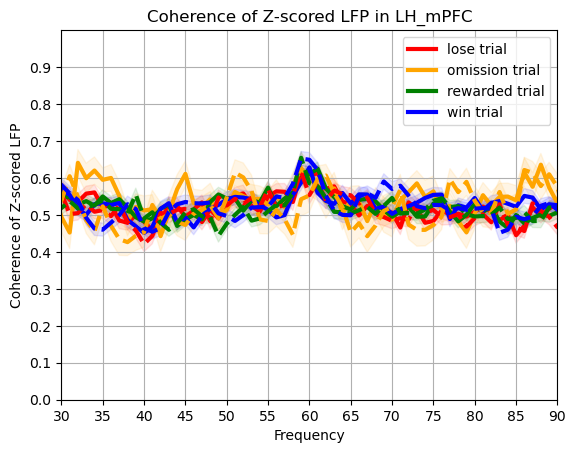

LH_vHPC


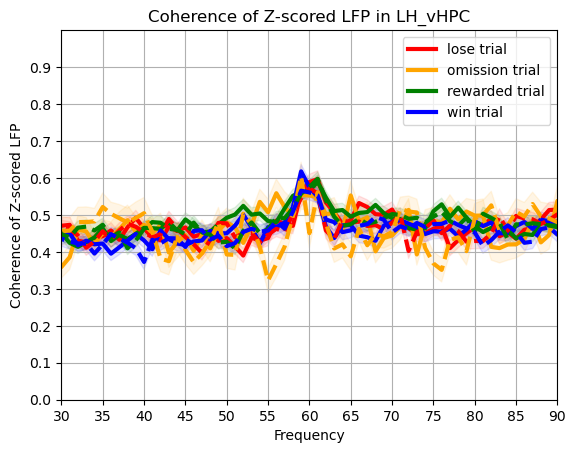

MD_mPFC


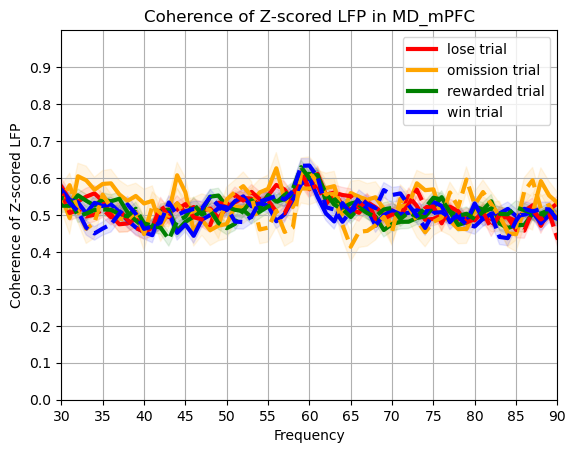

MD_vHPC


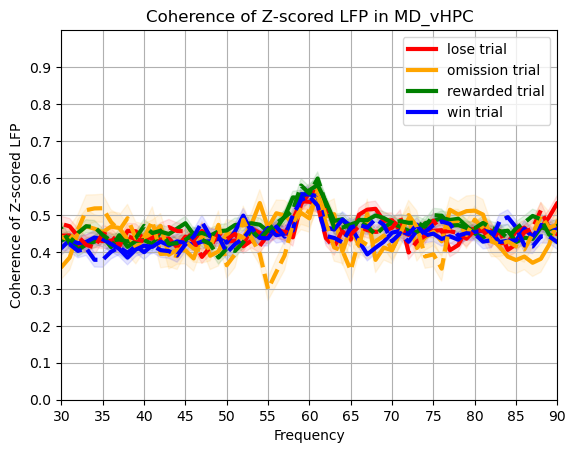

mPFC_vHPC


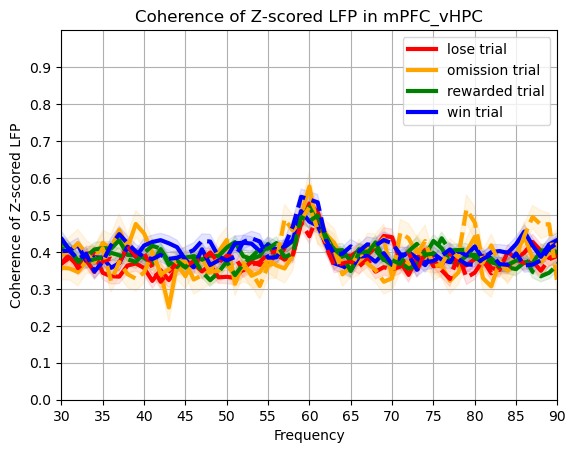

In [34]:
low_freq =30
high_freq = 90
for pair_base_name in all_pair_base_name:
    print(pair_base_name)
    
    fig, ax = plt.subplots()
    plt.title("Coherence of Z-scored LFP in {}".format(pair_base_name))
    plt.xlabel("Frequency")
    plt.ylabel("Coherence of Z-scored LFP")
    plt.xlim(low_freq, high_freq)
    plt.xticks(np.arange(low_freq, high_freq+1, 5))
    plt.yticks(np.arange(0, 1, 0.1))
    plt.ylim(0,1)
    plt.grid()

    for trial_or_baseline in TRIAL_AND_BASELINE:

        coherence_col = "{}_{}_coherence_magnitude".format(pair_base_name, trial_or_baseline)
        grouped_all_trials_df = channel_map_and_all_trials_df.groupby([GROUPINGS]).agg({coherence_col: lambda x: np.vstack(x.tolist())}).reset_index()
        # grouped_all_trials_df = grouped_all_trials_df[grouped_all_trials_df["trial_or_baseline"] == "trial"]
        grouped_all_trials_df["mean_coherence"] = grouped_all_trials_df[coherence_col].apply(lambda x: np.nanmean(np.vstack(x), axis=0))
        grouped_all_trials_df["std_coherence"] = grouped_all_trials_df[coherence_col].apply(lambda x: np.nanstd(np.vstack(x), axis=0))
        grouped_all_trials_df["n_trials"] = grouped_all_trials_df[coherence_col].apply(lambda x: np.sum(~np.isnan(x), axis=0))
        grouped_all_trials_df["sem_coherence"] = grouped_all_trials_df.apply(lambda x: x["std_coherence"] / np.sqrt(x["n_trials"]), axis=1)
        for index, row in grouped_all_trials_df.iterrows():
            try:
                if trial_or_baseline == "trial":
                    ax = sns.lineplot(x=all_frequencies, y=row["mean_coherence"], \
                label="{} {}".format(row[GROUPINGS], trial_or_baseline), color=BASELINE_OUTCOME_TO_COLOR[row[GROUPINGS]],
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                else:
                    ax = sns.lineplot(x=all_frequencies, y=row["mean_coherence"], \
                color=BASELINE_OUTCOME_TO_COLOR[row[GROUPINGS]],
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                

    
                plt.fill_between(all_frequencies, \
                row["mean_coherence"] - row["sem_coherence"], row["mean_coherence"] + row["sem_coherence"], alpha=0.1,
                color=BASELINE_OUTCOME_TO_COLOR[row[GROUPINGS]])
            except Exception as e: 
                print(e)


    
    # plt.savefig("./proc/coherence/{}_{}hz_{}_coherence_of_zscored_lfp.png".format(low_freq, high_freq, pair_base_name))
    plt.show()
    
    
    

    

BLA_LH


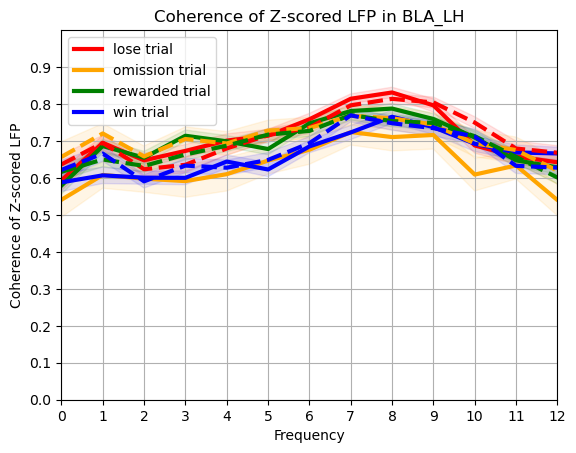

BLA_MD


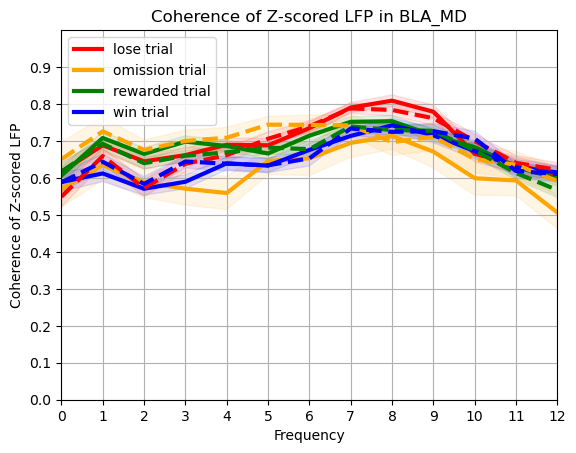

BLA_mPFC


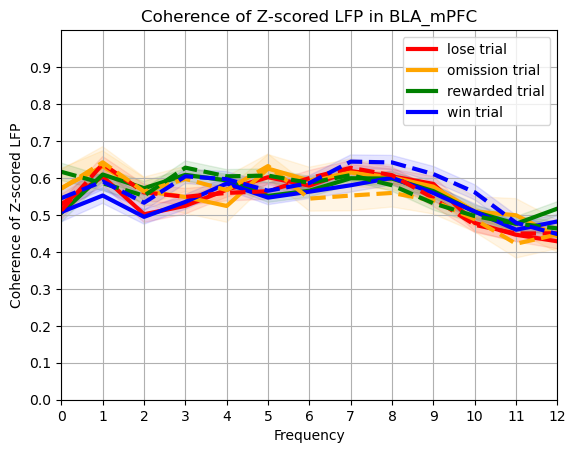

BLA_vHPC


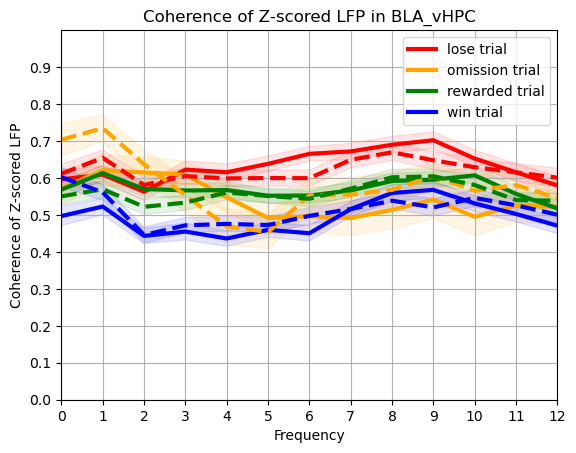

LH_MD


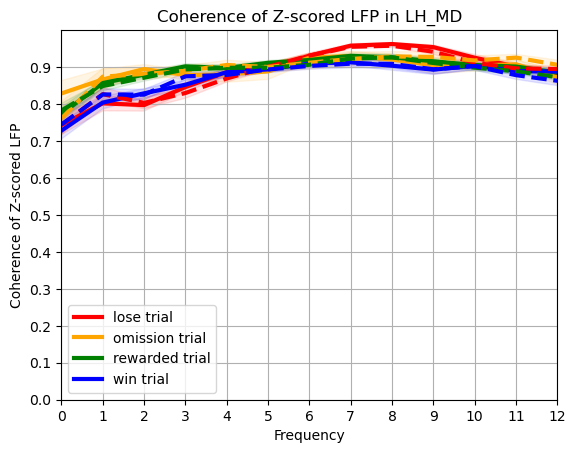

LH_mPFC


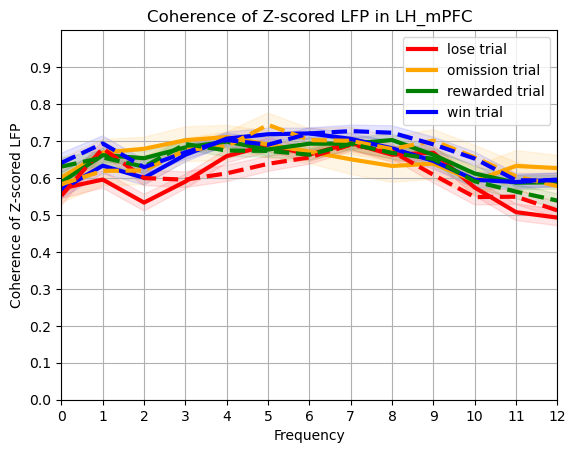

LH_vHPC


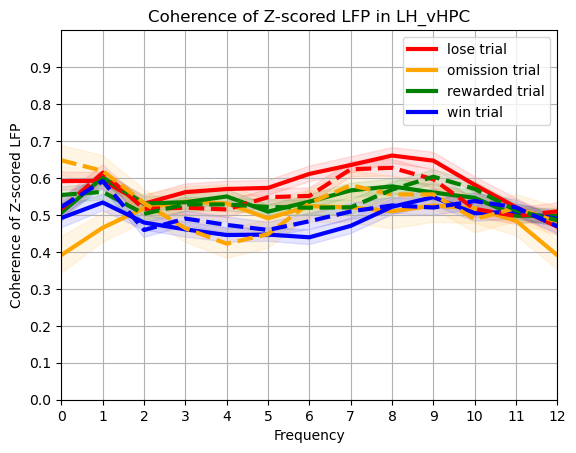

MD_mPFC


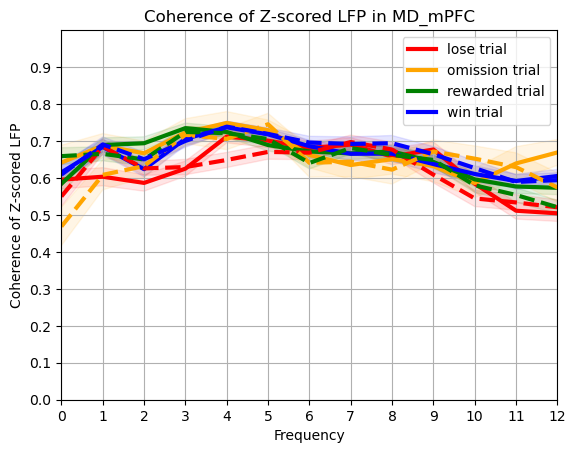

MD_vHPC


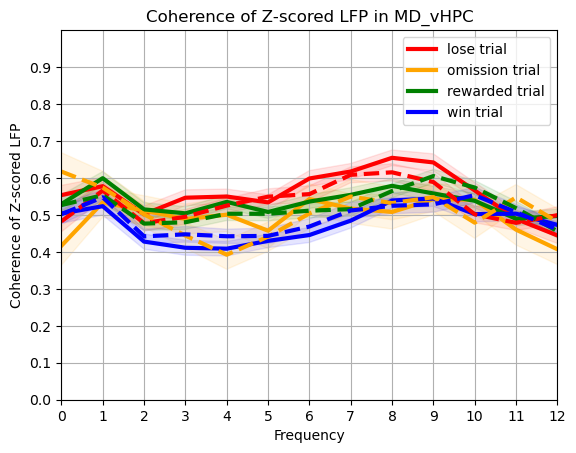

mPFC_vHPC


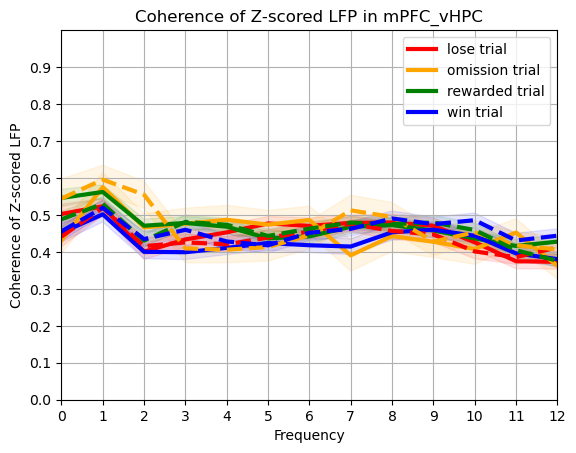

In [35]:
low_freq = 0
high_freq = 12
for pair_base_name in all_pair_base_name:
    print(pair_base_name)
    
    fig, ax = plt.subplots()
    plt.title("Coherence of Z-scored LFP in {}".format(pair_base_name))
    plt.xlabel("Frequency")
    plt.ylabel("Coherence of Z-scored LFP")
    plt.xlim(low_freq, high_freq)
    plt.xticks(np.arange(low_freq, high_freq+1, 1))
    plt.yticks(np.arange(0, 1, 0.1))
    plt.ylim(0,1)
    plt.grid()

    for trial_or_baseline in TRIAL_AND_BASELINE:

        coherence_col = "{}_{}_coherence_magnitude".format(pair_base_name, trial_or_baseline)
        grouped_all_trials_df = channel_map_and_all_trials_df.groupby([GROUPINGS]).agg({coherence_col: lambda x: np.vstack(x.tolist())}).reset_index()
        # grouped_all_trials_df = grouped_all_trials_df[grouped_all_trials_df["trial_or_baseline"] == "trial"]
        grouped_all_trials_df["mean_coherence"] = grouped_all_trials_df[coherence_col].apply(lambda x: np.nanmean(np.vstack(x), axis=0))
        grouped_all_trials_df["std_coherence"] = grouped_all_trials_df[coherence_col].apply(lambda x: np.nanstd(np.vstack(x), axis=0))
        grouped_all_trials_df["n_trials"] = grouped_all_trials_df[coherence_col].apply(lambda x: np.sum(~np.isnan(x), axis=0))
        grouped_all_trials_df["sem_coherence"] = grouped_all_trials_df.apply(lambda x: x["std_coherence"] / np.sqrt(x["n_trials"]), axis=1)
        for index, row in grouped_all_trials_df.iterrows():
            try:
                if trial_or_baseline == "trial":
                    ax = sns.lineplot(x=all_frequencies, y=row["mean_coherence"], \
                label="{} {}".format(row[GROUPINGS], trial_or_baseline), color=BASELINE_OUTCOME_TO_COLOR[row[GROUPINGS]],
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                else:
                    ax = sns.lineplot(x=all_frequencies, y=row["mean_coherence"], \
                color=BASELINE_OUTCOME_TO_COLOR[row[GROUPINGS]],
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                

    
                plt.fill_between(all_frequencies, \
                row["mean_coherence"] - row["sem_coherence"], row["mean_coherence"] + row["sem_coherence"], alpha=0.1,
                color=BASELINE_OUTCOME_TO_COLOR[row[GROUPINGS]])
            except Exception as e: 
                print(e)


    
    # plt.savefig("./proc/coherence/{}_{}hz_{}_coherence_of_zscored_lfp.png".format(low_freq, high_freq, pair_base_name))
    plt.show()
    
    
    

    

BLA_LH


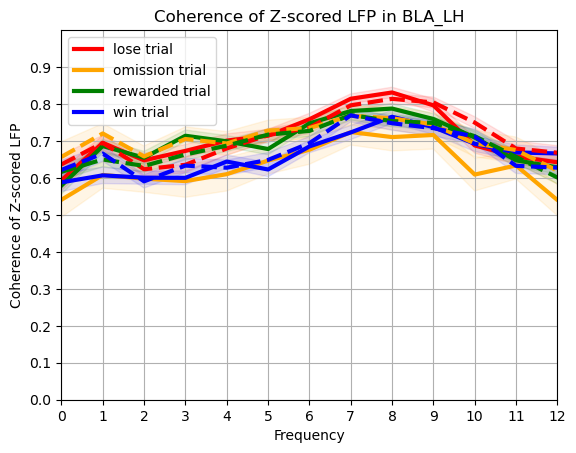

BLA_MD


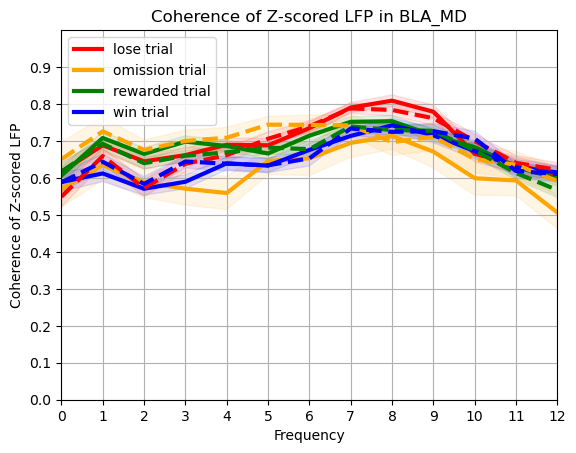

BLA_mPFC


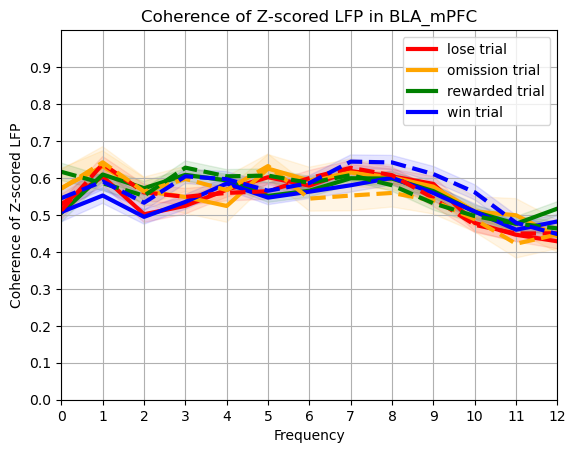

BLA_vHPC


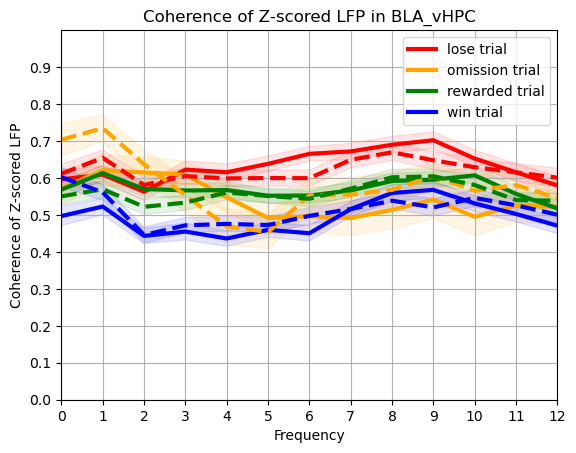

LH_MD


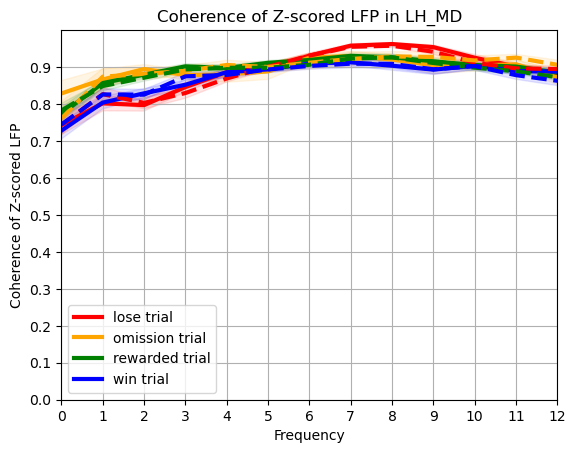

LH_mPFC


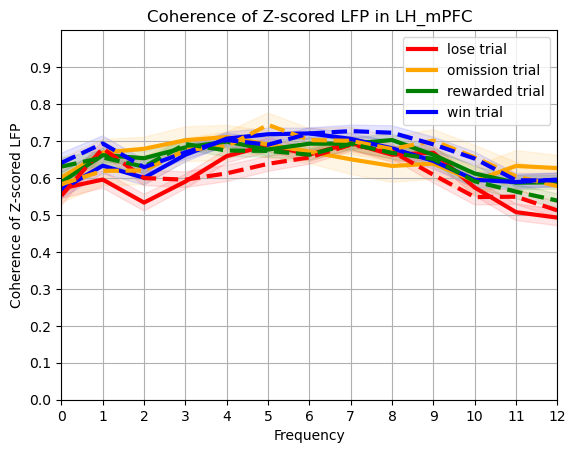

LH_vHPC


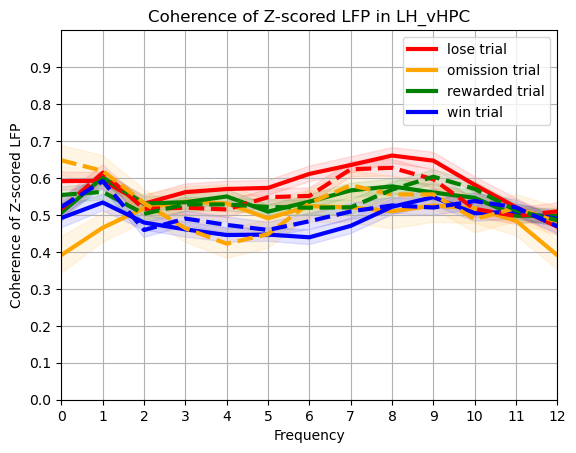

MD_mPFC


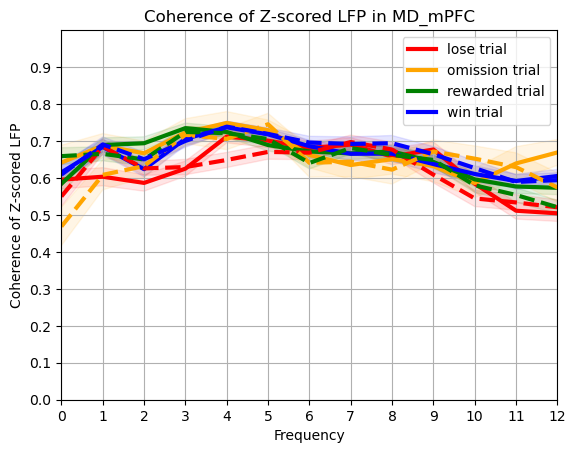

MD_vHPC


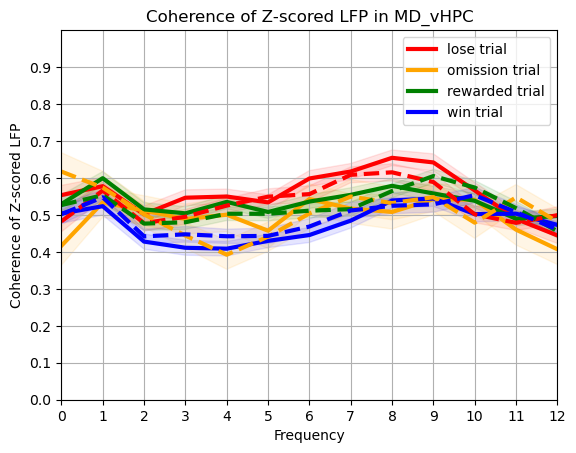

mPFC_vHPC


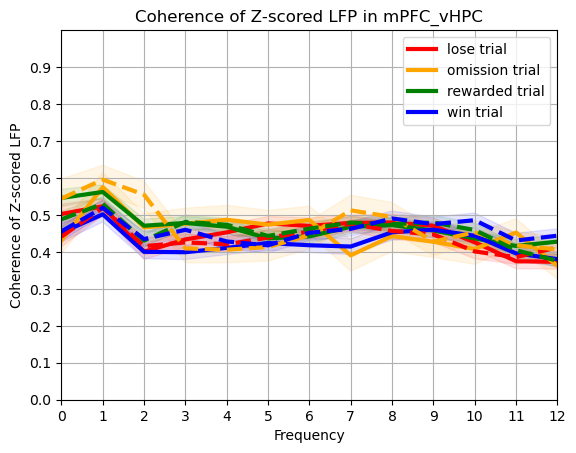

In [36]:
low_freq = 10
high_freq = 30
low_freq = 0
high_freq = 12
for pair_base_name in all_pair_base_name:
    print(pair_base_name)
    
    fig, ax = plt.subplots()
    plt.title("Coherence of Z-scored LFP in {}".format(pair_base_name))
    plt.xlabel("Frequency")
    plt.ylabel("Coherence of Z-scored LFP")
    plt.xlim(low_freq, high_freq)
    plt.xticks(np.arange(low_freq, high_freq+1, 1))
    plt.yticks(np.arange(0, 1, 0.1))
    plt.ylim(0,1)
    plt.grid()

    for trial_or_baseline in TRIAL_AND_BASELINE:

        coherence_col = "{}_{}_coherence_magnitude".format(pair_base_name, trial_or_baseline)
        grouped_all_trials_df = channel_map_and_all_trials_df.groupby([GROUPINGS]).agg({coherence_col: lambda x: np.vstack(x.tolist())}).reset_index()
        # grouped_all_trials_df = grouped_all_trials_df[grouped_all_trials_df["trial_or_baseline"] == "trial"]
        grouped_all_trials_df["mean_coherence"] = grouped_all_trials_df[coherence_col].apply(lambda x: np.nanmean(np.vstack(x), axis=0))
        grouped_all_trials_df["std_coherence"] = grouped_all_trials_df[coherence_col].apply(lambda x: np.nanstd(np.vstack(x), axis=0))
        grouped_all_trials_df["n_trials"] = grouped_all_trials_df[coherence_col].apply(lambda x: np.sum(~np.isnan(x), axis=0))
        grouped_all_trials_df["sem_coherence"] = grouped_all_trials_df.apply(lambda x: x["std_coherence"] / np.sqrt(x["n_trials"]), axis=1)
        for index, row in grouped_all_trials_df.iterrows():
            try:
                if trial_or_baseline == "trial":
                    ax = sns.lineplot(x=all_frequencies, y=row["mean_coherence"], \
                label="{} {}".format(row[GROUPINGS], trial_or_baseline), color=BASELINE_OUTCOME_TO_COLOR[row[GROUPINGS]],
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                else:
                    ax = sns.lineplot(x=all_frequencies, y=row["mean_coherence"], \
                color=BASELINE_OUTCOME_TO_COLOR[row[GROUPINGS]],
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                

    
                plt.fill_between(all_frequencies, \
                row["mean_coherence"] - row["sem_coherence"], row["mean_coherence"] + row["sem_coherence"], alpha=0.1,
                color=BASELINE_OUTCOME_TO_COLOR[row[GROUPINGS]])
            except Exception as e: 
                print(e)


    
    # plt.savefig("./proc/coherence/{}_{}hz_{}_coherence_of_zscored_lfp.png".format(low_freq, high_freq, pair_base_name))
    plt.show()
    
    
    

    
    
    
    

    

BLA_LH


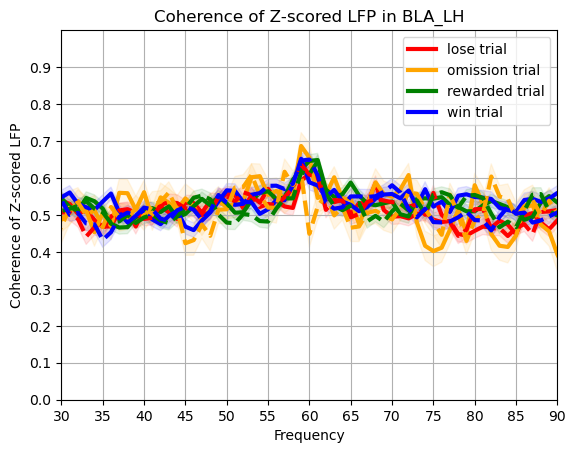

BLA_MD


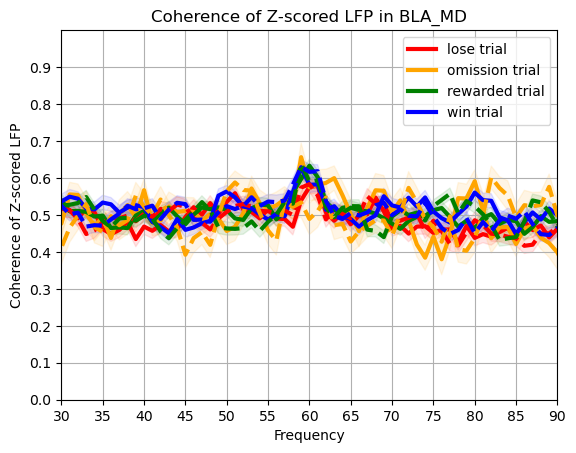

BLA_mPFC


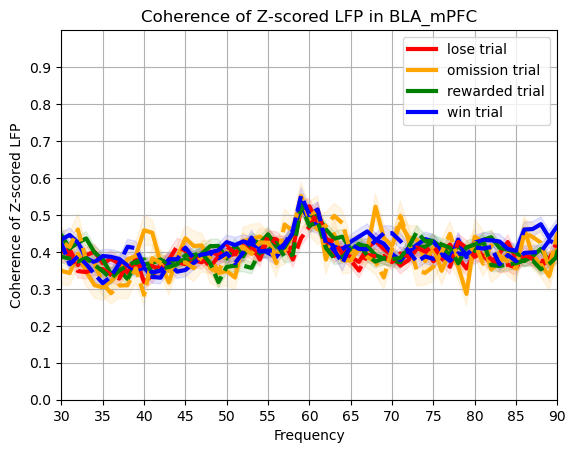

BLA_vHPC


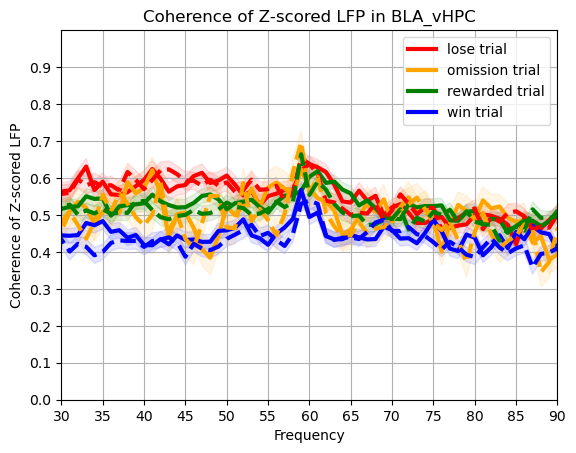

LH_MD


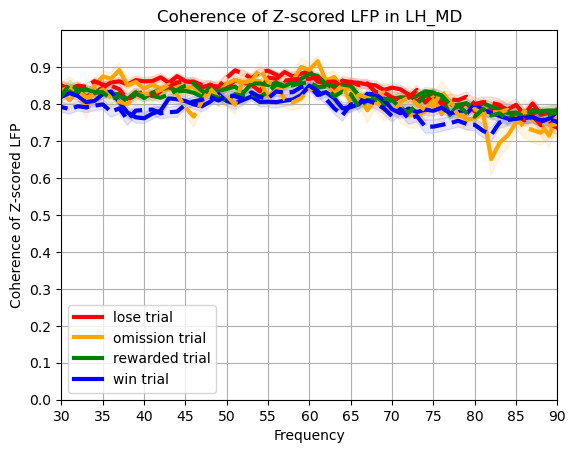

LH_mPFC


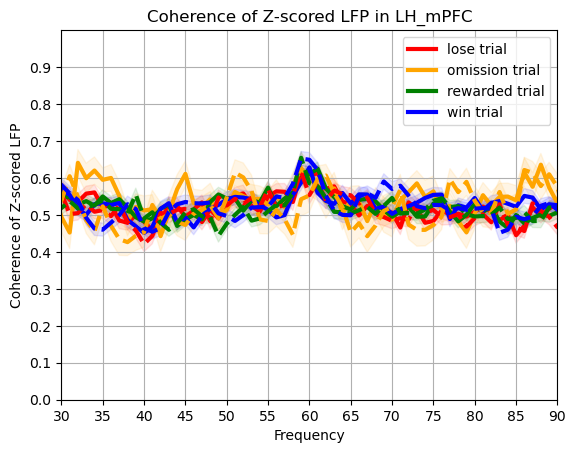

LH_vHPC


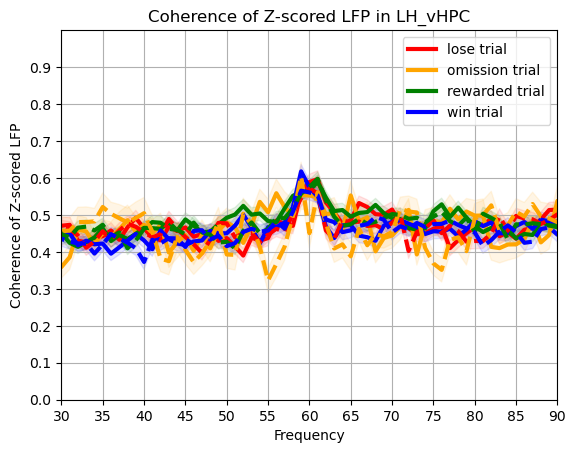

MD_mPFC


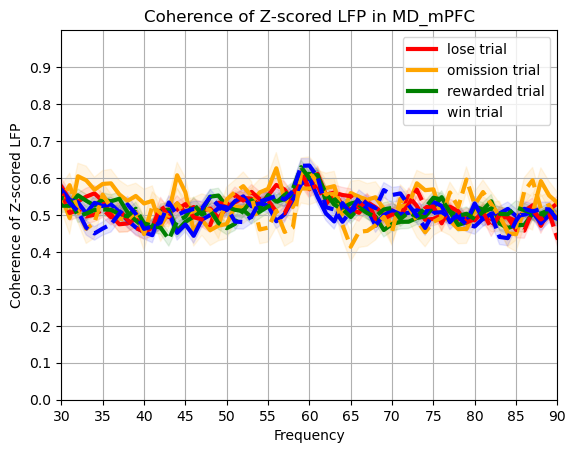

MD_vHPC


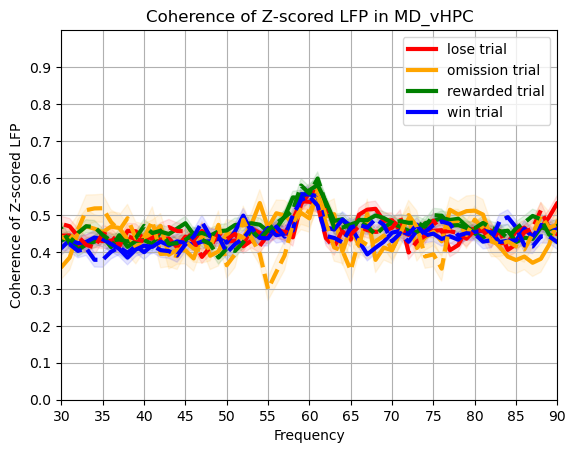

mPFC_vHPC


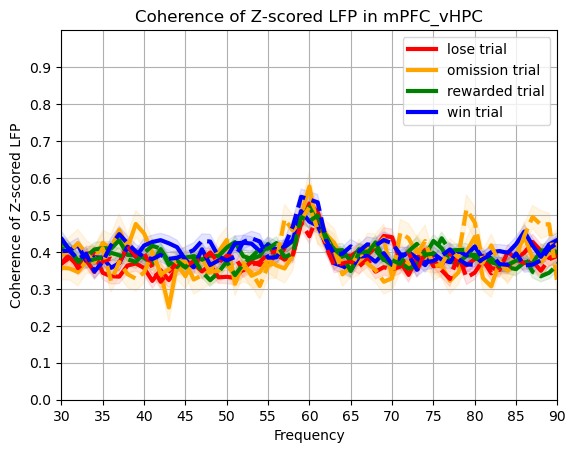

In [37]:
low_freq = 30
high_freq = 90

for pair_base_name in all_pair_base_name:
    print(pair_base_name)
    
    fig, ax = plt.subplots()
    plt.title("Coherence of Z-scored LFP in {}".format(pair_base_name))
    plt.xlabel("Frequency")
    plt.ylabel("Coherence of Z-scored LFP")
    plt.xlim(low_freq, high_freq)
    plt.xticks(np.arange(low_freq, high_freq+1, 5))
    plt.yticks(np.arange(0, 1, 0.1))
    plt.ylim(0,1)
    plt.grid()

    for trial_or_baseline in TRIAL_AND_BASELINE:

        coherence_col = "{}_{}_coherence_magnitude".format(pair_base_name, trial_or_baseline)
        grouped_all_trials_df = channel_map_and_all_trials_df.groupby([GROUPINGS]).agg({coherence_col: lambda x: np.vstack(x.tolist())}).reset_index()
        # grouped_all_trials_df = grouped_all_trials_df[grouped_all_trials_df["trial_or_baseline"] == "trial"]
        grouped_all_trials_df["mean_coherence"] = grouped_all_trials_df[coherence_col].apply(lambda x: np.nanmean(np.vstack(x), axis=0))
        grouped_all_trials_df["std_coherence"] = grouped_all_trials_df[coherence_col].apply(lambda x: np.nanstd(np.vstack(x), axis=0))
        grouped_all_trials_df["n_trials"] = grouped_all_trials_df[coherence_col].apply(lambda x: np.sum(~np.isnan(x), axis=0))
        grouped_all_trials_df["sem_coherence"] = grouped_all_trials_df.apply(lambda x: x["std_coherence"] / np.sqrt(x["n_trials"]), axis=1)
        for index, row in grouped_all_trials_df.iterrows():
            try:
                if trial_or_baseline == "trial":
                    ax = sns.lineplot(x=all_frequencies, y=row["mean_coherence"], \
                label="{} {}".format(row[GROUPINGS], trial_or_baseline), color=BASELINE_OUTCOME_TO_COLOR[row[GROUPINGS]],
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                else:
                    ax = sns.lineplot(x=all_frequencies, y=row["mean_coherence"], \
                color=BASELINE_OUTCOME_TO_COLOR[row[GROUPINGS]],
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                

    
                plt.fill_between(all_frequencies, \
                row["mean_coherence"] - row["sem_coherence"], row["mean_coherence"] + row["sem_coherence"], alpha=0.1,
                color=BASELINE_OUTCOME_TO_COLOR[row[GROUPINGS]])
            except Exception as e: 
                print(e)


    
    # plt.savefig("./proc/coherence/{}_{}hz_{}_coherence_of_zscored_lfp.png".format(low_freq, high_freq, pair_base_name))
    plt.show()
    
    
    

    
    
    
    

    

In [39]:
all_frequencies[4:13]

array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [40]:
FREQUENCY_BANDS = (4,13)

In [41]:
BAND_TO_FREQUENCY = {"theta": (4,13), "beta": (12,31), "gamma": (30, 90)}

In [42]:
BAND_TO_ALL_COL = {"theta": [], "beta": [], "gamma": []}

In [45]:
all_coherence_col = [col for col in channel_map_and_all_trials_df.columns if "trial_coherence_magnitude" in col]
for band, frequency in BAND_TO_FREQUENCY.items():
    for col in all_coherence_col:
        BAND_COL = "{}_averaged_{}_coherence".format("_".join(col.split("_")[:-2]), band)
        BAND_TO_ALL_COL[band].append(BAND_COL)
        print(BAND_COL)
        channel_map_and_all_trials_df[BAND_COL] = channel_map_and_all_trials_df[col].apply(lambda x: np.mean(x[frequency[0]:frequency[1]]))    


BLA_LH_trial_averaged_theta_coherence
BLA_MD_trial_averaged_theta_coherence
BLA_mPFC_trial_averaged_theta_coherence
BLA_vHPC_trial_averaged_theta_coherence
LH_MD_trial_averaged_theta_coherence
LH_mPFC_trial_averaged_theta_coherence
LH_vHPC_trial_averaged_theta_coherence
MD_mPFC_trial_averaged_theta_coherence
MD_vHPC_trial_averaged_theta_coherence
mPFC_vHPC_trial_averaged_theta_coherence
BLA_LH_trial_averaged_beta_coherence
BLA_MD_trial_averaged_beta_coherence
BLA_mPFC_trial_averaged_beta_coherence
BLA_vHPC_trial_averaged_beta_coherence
LH_MD_trial_averaged_beta_coherence
LH_mPFC_trial_averaged_beta_coherence
LH_vHPC_trial_averaged_beta_coherence
MD_mPFC_trial_averaged_beta_coherence
MD_vHPC_trial_averaged_beta_coherence
mPFC_vHPC_trial_averaged_beta_coherence
BLA_LH_trial_averaged_gamma_coherence
BLA_MD_trial_averaged_gamma_coherence
BLA_mPFC_trial_averaged_gamma_coherence
BLA_vHPC_trial_averaged_gamma_coherence
LH_MD_trial_averaged_gamma_coherence
LH_mPFC_trial_averaged_gamma_coherenc

In [46]:
channel_map_and_all_trials_df[GROUPINGS].unique()

array(['rewarded', 'omission', 'win', 'lose'], dtype=object)

In [52]:
region_pair_to_outcome_to_coherence = {k: defaultdict(nested_dict) for k,v in BAND_TO_FREQUENCY.items()}

for band, frequency in BAND_TO_FREQUENCY.items():
    for outcome in channel_map_and_all_trials_df[GROUPINGS].unique():
        outcome_df = channel_map_and_all_trials_df[channel_map_and_all_trials_df[GROUPINGS] == outcome].copy()
        for band_col in BAND_TO_ALL_COL[band]:
            region_pair_to_outcome_to_coherence[band]["_".join(band_col.split("_")[:-3])][outcome]["mean"] = outcome_df[band_col].mean() 
            region_pair_to_outcome_to_coherence[band]["_".join(band_col.split("_")[:-3])][outcome]["std"] = outcome_df[band_col].sem() 




In [53]:
BAND_TO_ALL_COL

{'theta': ['BLA_LH_trial_averaged_theta_coherence',
  'BLA_MD_trial_averaged_theta_coherence',
  'BLA_mPFC_trial_averaged_theta_coherence',
  'BLA_vHPC_trial_averaged_theta_coherence',
  'LH_MD_trial_averaged_theta_coherence',
  'LH_mPFC_trial_averaged_theta_coherence',
  'LH_vHPC_trial_averaged_theta_coherence',
  'MD_mPFC_trial_averaged_theta_coherence',
  'MD_vHPC_trial_averaged_theta_coherence',
  'mPFC_vHPC_trial_averaged_theta_coherence'],
 'beta': ['BLA_LH_trial_averaged_beta_coherence',
  'BLA_MD_trial_averaged_beta_coherence',
  'BLA_mPFC_trial_averaged_beta_coherence',
  'BLA_vHPC_trial_averaged_beta_coherence',
  'LH_MD_trial_averaged_beta_coherence',
  'LH_mPFC_trial_averaged_beta_coherence',
  'LH_vHPC_trial_averaged_beta_coherence',
  'MD_mPFC_trial_averaged_beta_coherence',
  'MD_vHPC_trial_averaged_beta_coherence',
  'mPFC_vHPC_trial_averaged_beta_coherence'],
 'gamma': ['BLA_LH_trial_averaged_gamma_coherence',
  'BLA_MD_trial_averaged_gamma_coherence',
  'BLA_mPFC_tria

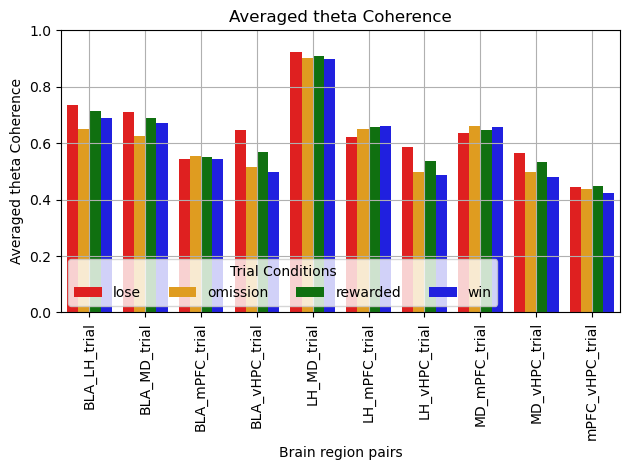

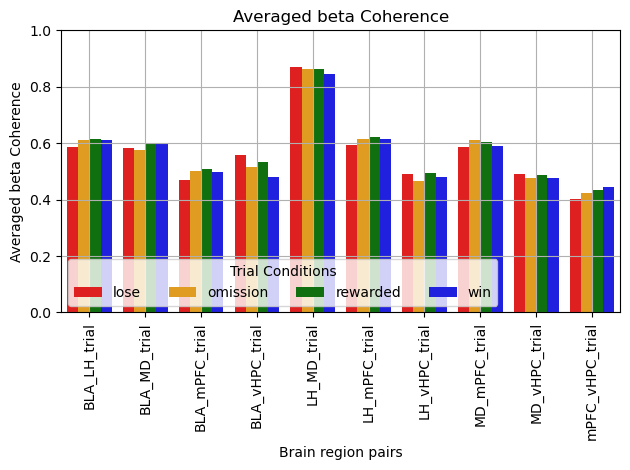

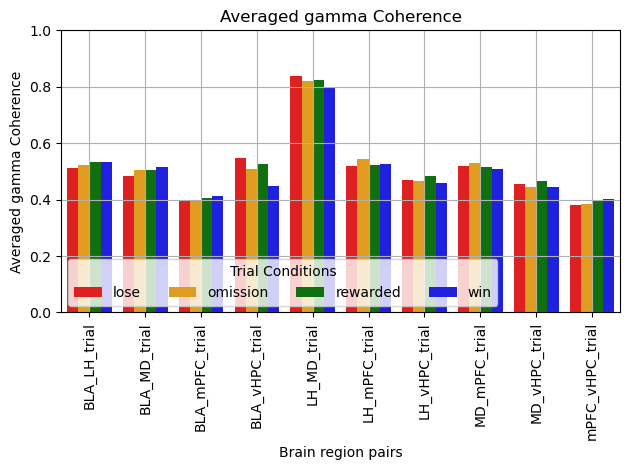

In [55]:
for band, frequency in BAND_TO_FREQUENCY.items(): 
    # Convert the nested dictionary to a DataFrame
    data = []
    for group_name, group_data in region_pair_to_outcome_to_coherence[band].items():
        for bar_name, bar_dict in group_data.items():
            data.append({"Group": group_name, "Bar": bar_name, "coherence": bar_dict["mean"], "std": bar_dict["std"]})
    df = pd.DataFrame(data).sort_values(by=["Group", "Bar"])
    df["color"] = df["Bar"].map(BASELINE_OUTCOME_TO_COLOR)
    
    # Create barplot
    ax = sns.barplot(x='Group', y='coherence', hue='Bar', data=df, palette=df["color"], ci=None)
    
    # Adding error bars
    groups = df['Group'].unique()
    bars_per_group = df['Bar'].nunique()
    bar_width = 0.8 / bars_per_group
    x_positions = []
    
    for i, group in enumerate(groups):
        num_bars = df[df['Group'] == group].shape[0]
        group_positions = np.linspace(i - bar_width*(num_bars-1)/2, i + bar_width*(num_bars-1)/2, num_bars)
        x_positions.extend(group_positions)
    
    plt.xticks(rotation=90)
    plt.xlabel("Brain region pairs")
    plt.ylabel("Averaged {} Coherence".format(band))
    plt.legend(title="Trial Conditions", loc="lower left", ncol=4)
    plt.title("Averaged {} Coherence".format(band))
    plt.tight_layout()
    plt.grid()
    plt.ylim(0,1)
    
    # plt.savefig("./proc/coherence/all_zscored_{}_lfp_power_coherence.png".format(band))
    # Show the plot
    plt.show()

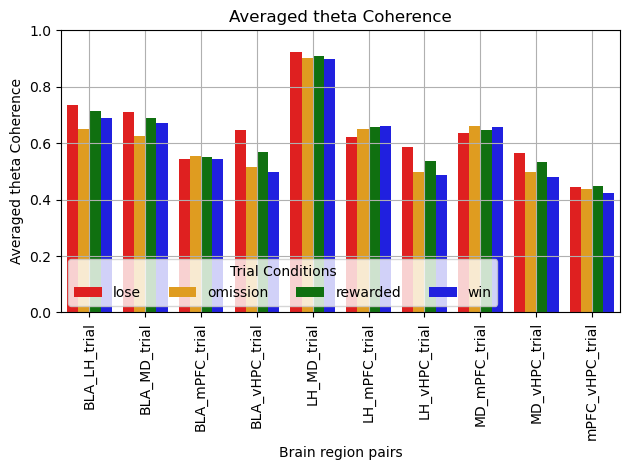

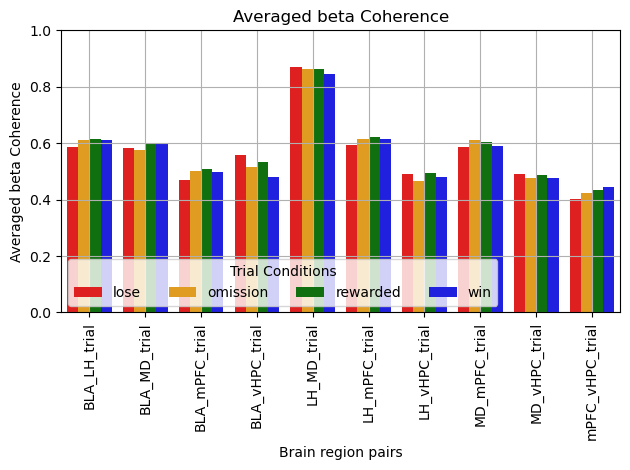

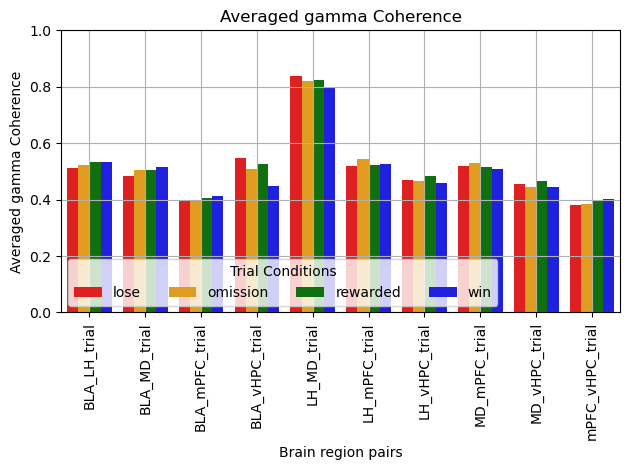

In [56]:
for band, frequency in BAND_TO_FREQUENCY.items(): 
    # Convert the nested dictionary to a DataFrame
    data = []
    for group_name, group_data in region_pair_to_outcome_to_coherence[band].items():
        for bar_name, bar_dict in group_data.items():
            data.append({"Group": group_name, "Bar": bar_name, "coherence": bar_dict["mean"], "std": bar_dict["std"]})
    df = pd.DataFrame(data).sort_values(by=["Group", "Bar"])
    df["color"] = df["Bar"].map(BASELINE_OUTCOME_TO_COLOR)
    
    # Create barplot
    ax = sns.barplot(x='Group', y='coherence', hue='Bar', data=df, palette=df["color"], ci=None)
    
    # Adding error bars
    groups = df['Group'].unique()
    bars_per_group = df['Bar'].nunique()
    bar_width = 0.8 / bars_per_group
    x_positions = []
    
    for i, group in enumerate(groups):
        num_bars = df[df['Group'] == group].shape[0]
        group_positions = np.linspace(i - bar_width*(num_bars-1)/2, i + bar_width*(num_bars-1)/2, num_bars)
        x_positions.extend(group_positions)
    
    plt.xticks(rotation=90)
    plt.xlabel("Brain region pairs")
    plt.ylabel("Averaged {} Coherence".format(band))
    plt.legend(title="Trial Conditions", loc="lower left", ncol=4)
    plt.title("Averaged {} Coherence".format(band))
    plt.tight_layout()
    plt.grid()
    plt.ylim(0,1)
    
    # plt.savefig("./proc/coherence/all_zscored_{}_lfp_power_coherence.png".format(band))
    # Show the plot
    plt.show()

In [57]:
channel_map_and_all_trials_df["LH_baseline_lfp_trace"].iloc[0].shape

(10000,)

In [61]:
KEEP_COLUMNS = ["time",
"recording_dir",
"recording_file",
"time_stamp_index",
"video_file",
"video_frame",
"video_number",
"subject_info",
"competition_closeness",
"video_name",
"all_subjects",
"current_subject",
"trial_outcome",
"lfp_index",
"baseline_lfp_timestamp_range",
"trial_lfp_timestamp_range",
"baseline_ephys_timestamp_range",
"trial_ephys_timestamp_range",
"baseline_videoframe_range",
"trial_videoframe_range",
"trial_number",
"Cohort",
"spike_interface_mPFC",
"spike_interface_vHPC",
"spike_interface_BLA",
"spike_interface_LH",
"spike_interface_MD"]

In [62]:
channel_map_and_all_trials_df.columns

Index(['index', 'time', 'recording_dir', 'recording_file', 'time_stamp_index',
       'video_file', 'video_frame', 'video_number', 'subject_info',
       'competition_closeness',
       ...
       'BLA_LH_trial_averaged_gamma_coherence',
       'BLA_MD_trial_averaged_gamma_coherence',
       'BLA_mPFC_trial_averaged_gamma_coherence',
       'BLA_vHPC_trial_averaged_gamma_coherence',
       'LH_MD_trial_averaged_gamma_coherence',
       'LH_mPFC_trial_averaged_gamma_coherence',
       'LH_vHPC_trial_averaged_gamma_coherence',
       'MD_mPFC_trial_averaged_gamma_coherence',
       'MD_vHPC_trial_averaged_gamma_coherence',
       'mPFC_vHPC_trial_averaged_gamma_coherence'],
      dtype='object', length=148)

In [63]:
KEEP_COLUMNS += [col for col in channel_map_and_all_trials_df.columns if "coherence_magnitude" in col]
KEEP_COLUMNS += [col for col in channel_map_and_all_trials_df.columns if "averaged" in col]
KEEP_COLUMNS += [col for col in channel_map_and_all_trials_df.columns if "frequencies" in col]



In [64]:
channel_map_and_all_trials_df[KEEP_COLUMNS].to_pickle("./proc/rce_lfp_coherence.pkl")